# Golf Final Project Airfoil Optimization

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Airfoil Generators

In [2]:
def generate_airfoil(length, x0, y0):
    C = .15

    a = np.sqrt((C-x0)**2+y0**2)

    zeta = np.linspace(0, 2*np.pi, length)
    epsilon_surf = x0 + a*np.cos(zeta)
    epsilon_surf = epsilon_surf + C**2*epsilon_surf/((x0+a*np.cos(zeta))**2+(y0+a*np.sin(zeta))**2)

    eta_surf = y0 + a*np.sin(zeta)
    eta_surf = eta_surf - C**2*eta_surf/((x0+a*np.cos(zeta))**2+(y0+a*np.sin(zeta))**2)
    
    return np.column_stack((epsilon_surf + 0.3,eta_surf))

In [3]:
def generate_NACA_airfoil(length, x0, y0):
    #
    # To Do
    #
    return airfoil

## Xfoil Interface

In [4]:
def read_airfoil(filename):
    file = open(filename,'r')
    lines = file.readlines()

    matrix = np.zeros((len(lines),2))

    n = 0
    for line in lines:
        if n != 0:
            tmp = line.strip()
            tmp = tmp.split(" ")
            matrix[n - 1][0], matrix[n - 1][1] = tmp[0], tmp[len(tmp)-1]
        n += 1

    return matrix

In [5]:
def write_airfoil(airfoil, name):
    file = open(name + '.dat', 'w')
    file.write(name)
    for x in airfoil:
        file.write(str(x[0]) + ' ' + str(x[1]) + '\n')
    
    file.close()

In [6]:
def run_xfoil(name, n_crit, Re):
    #
    # Still Needs to be debugged 
    #
    xfoil_ps = sp.call(r'xfoil.exe', stdin=sp.PIPE, stderr=None, stdout=None)
    xfoil_ps.stdin.write(('load '+name+'.dat \n').encode('ascii'))
    xfoil_ps.stdin.write(('OPER').encode('ascii'))
    xfoil_ps.stdin.write(('Vpar').encode('ascii'))
    xfoil_ps.stdin.write(('N '+str(n_crit)).encode('ascii'))
    xfoil_ps.stdin.write((' ').encode('ascii'))
    xfoil_ps.stdin.write(('visc '+str(Re)).encode('ascii'))
    xfoil_ps.stdin.write(('PACC').encode('ascii'))
    xfoil_ps.stdin.write((name+'.log').encode('ascii'))  # output file
    xfoil_ps.stdin.write((' ').encode('ascii'))          # no dump file
    xfoil_ps.stdin.write(('aseq 0.0 15.0 1.0').encode('ascii'))
    xfoil_ps.stdin.write((' ').encode('ascii'))     # escape OPER
    xfoil_ps.stdin.write(('quit').encode('ascii'))  # exit
    xfoil_ps.stdin.close()
    xfoil_ps.kill()

## XFlyr Interface

In [7]:
#
# If we have time we should do this too but it would involve modifing 
# XFlyr's source code
#

## VEGA Algorithm

### Initial Population Generation

In [8]:
def generate_initial_population(population_size, num_of_pts):
    population = []
    x = np.linspace(-0.001, -0.1, population_size)
    i = 0
    while i < population_size:
        # This could change depending on what sort of starting
        # conditions we have
        population.append(generate_airfoil(num_of_pts, x[i], 0))
        i+=1
    return population

### Fitness Calculation

In [9]:
def compute_airfoil_fitness_conditionA(airfoil):
    #
    # To Do Involves Running Xfoil
    #
    return airfoil

In [10]:
def compute_airfoil_fitness_conditionA(airfoil):
    #
    # To Do Involves Running Xfoil
    #
    return airfoil

### Crossover

In [54]:
def airfoil_crossover(airfoil1, airfoil2):
    child = []
    for i in range(len(airfoil1)):
        if (int(100 * random.random()) < 50):
            child.append([airfoil1[i,0], airfoil1[i,1]])
        else:
            child.append([airfoil2[i,0], airfoil2[i,1]])
    return child

In [12]:
def select_best_airfoils(sorted_population):
    #
    # To Do may be different depending on the algorithm chosen
    #
    next_generation = []
    

In [13]:
def population_crossover(population):
    #
    # To Do
    #
    return population

### Mutation

In [14]:
def airfoil_mutation(airfoil):
    #
    # To Do
    #
    index_modification = int(random.random() * len(airfoil))
    
    return airfoil

In [15]:
def population_mutation(airfoil_population, mutation_probability):
    for i in range(len(airfoil_population)):
        if random.random() * 100 < mutation_probability:
            airfoil_population[i] = airfoil_mutation(airfoil_population[i])
    return airfoil_population

### VEGA Main Loop

In [16]:
def VEGA(population_size, num_of_pts, num_generations, tol):
    #
    #
    # I am still working on this
    #
    #
    population = generate_initial_population(population_size, num_of_pts)
    best_fitness = 100; # just an arbitrary number
    
    K = 2
    Ns = population_size/K
    
    n = 0
    while n < num_generations or best_fitness < tol:
        #
        # This is to find the best fit
        #
        breeders = select_best_airfoils(population)
        population = population_crossover(breeders)
        population = population_mutation(population)
        n += 1
            
    return population

## Diagnostics/Extra Tools

In [17]:
def plot_airfoil(airfoil):
    plt.plot(airfoil[:,0], airfoil[:,1])
    plt.axis('equal')
    plt.show()

In [18]:
def sample_fitness_function(true_airfoil, test_airfoil):
    tol = 0.1
    score = 0
    i = 0
    while (i < len(true_airfoil)):
        if ((true_airfoil[i][0]-tol) <= test_airfoil[i][0] <= (true_airfoil[i][0]+tol) and 
            (true_airfoil[i][1]-tol) <= test_airfoil[i][1] <= (true_airfoil[i][1]+tol) ):
            score+=1
        i+=1
    return score * 100 / len(true_airfoil)

## Test Area

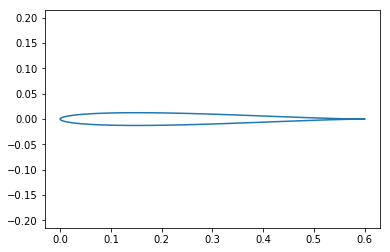

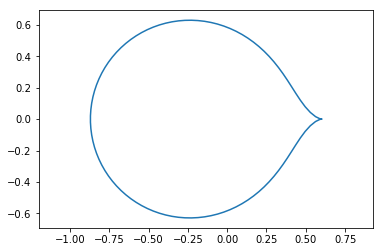

[[  6.00000000e-01   0.00000000e+00]
 [  5.99355112e-01   1.36328700e-06]
 [  5.97423595e-01   1.08688656e-05]
 [  5.94214874e-01   3.64727711e-05]
 [  5.89744575e-01   8.57626821e-05]
 [  5.84034411e-01   1.65784016e-04]
 [  5.77112016e-01   2.82878038e-04]
 [  5.69010749e-01   4.42535467e-04]
 [  5.59769443e-01   6.49268659e-04]
 [  5.49432134e-01   9.06504935e-04]
 [  5.38047747e-01   1.21650310e-03]
 [  5.25669762e-01   1.58029457e-03]
 [  5.12355858e-01   1.99765001e-03]
 [  4.98167531e-01   2.46707158e-03]
 [  4.83169707e-01   2.98581065e-03]
 [  4.67430343e-01   3.54990982e-03]
 [  4.51020022e-01   4.15426811e-03]
 [  4.34011550e-01   4.79272722e-03]
 [  4.16479550e-01   5.45817682e-03]
 [  3.98500071e-01   6.14267625e-03]
 [  3.80150198e-01   6.83758994e-03]
 [  3.61507679e-01   7.53373360e-03]
 [  3.42650560e-01   8.22152830e-03]
 [  3.23656842e-01   8.89115935e-03]
 [  3.04604150e-01   9.53273718e-03]
 [  2.85569420e-01   1.01364573e-02]
 [  2.66628604e-01   1.06927570e-02]
 

In [57]:
#
# Area to test functions
#
airfoil1 = generate_airfoil(100,-0.005, 0)
airfoil2 = generate_airfoil(100,-0.5, 0)
plot_airfoil(airfoil1)
plot_airfoil(airfoil2)
airfoil3 = airfoil_crossover(airfoil1, airfoil2)
print(airfoil1)
print(airfoil3)

In [58]:
np.column_stack(airfoil3)

array([[  6.00000000e-01,   5.89209752e-01,   5.62239541e-01,
          5.29086910e-01,   4.96233941e-01,   4.65673770e-01,
          5.77112016e-01,   5.69010749e-01,   5.59769443e-01,
          3.55195520e-01,   5.38047747e-01,   2.97661948e-01,
          5.12355858e-01,   2.35299030e-01,   4.83169707e-01,
          1.67673153e-01,   1.31964927e-01,   4.34011550e-01,
          5.71630890e-02,   3.98500071e-01,   3.80150198e-01,
         -6.17820651e-02,   3.42650560e-01,   3.23656842e-01,
          3.04604150e-01,  -2.27128669e-01,  -2.68651722e-01,
          2.47856394e-01,   2.29325965e-01,  -3.91118629e-01,
         -4.30709050e-01,   1.75889421e-01,   1.59019463e-01,
          1.42726586e-01,  -5.78789137e-01,   1.12107691e-01,
          9.78922158e-02,   8.44746565e-02,  -7.03567085e-01,
         -7.30154862e-01,  -7.54676529e-01,  -7.77034216e-01,
         -7.97138645e-01,   2.31471865e-02,  -8.30275775e-01,
         -8.43176035e-01,   6.32606917e-03,   2.92744898e-03,
        

In [48]:
x.append([1,2])

In [49]:
x

[[1, 2]]

In [50]:
x.append([2,3])

In [51]:
x

[[1, 2], [2, 3]]